# Material
```
Material(params: Dict, rid: RiiDataFrame)
```

This class provides the dielectric function for the material specified by given id. If the argument __bound_check__ is True, ValueError is raised when the wavelength exeeds the domain of experimental data.

__params__ can includes the following parameters,
* 'PEC' (bool): True if you want to create perfect electric conductor. Defaults to False.
* 'id' (int): ID number.
* 'book' (str): book value in catalog of RiiDataFrame.
* 'page' (str): page value in catalog of RiiDataFrame.
* 'RI' (complex): Constant refractive index.
* 'e' (complex): Constant permittivity.
* 'bound_check' (bool): True if bound check should be done. Defaults to True.
* 'im_factor' (floot): A magnification factor multiplied to the imaginary part of permittivity. Defaults to 1.0.

This class extends the functionality of refractiveindex.info database:
* It is possible to define dielectric materials that has constant permittivity.
* Imaginary part of dielectric function can be magnified using 'im_factor' parameter.
* Perfect Electric Conductor is defined as an artificial metal labeled "PEC", which has negative large permittivity (-1e8).
* Material is callable with a single value argument, angular frequency argument ω. The evaluation process is omitted if it is called with the same argument.

However, n, k and eps methos of this class are not numpy.ufunc. You can pass them only a single value.

In [1]:
import riip
rid = riip.RiiDataFrame()
water = riip.Material({'id': 428}, rid)
print(f"{water.catalog['book']} {water.catalog['page']}")
print(f"{water.catalog['wl_min']} <= λ <= {water.catalog['wl_max']}")

H2O Kedenburg
0.5 <= λ <= 1.6


## Reflactive Index __n__
```
n(wl: ArrayLike) -> numpy.ndarray
```
## Extinction Coefficient __k__
```
k(wl: ArrayLike) -> numpy.ndarray
```
## Dielectric Function __eps__
```
eps(wl: ArrayLike) -> numpy.ndarray
```
Wavelengths __wl__ can be given as a single complex value or an array of complex values.

In [2]:
wl = 1.0
n = water.n(wl)
k = water.k(wl)
eps = water.eps(wl)
print(f"At λ={wl}μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=1.0μm:
  n=1.3248733548067675
  k=3.19106e-06
  ε=(1.755289406266756+8.455500735179367e-06j)


In [3]:
import numpy as np
wls = np.linspace(0.5, 1.6)
water.eps(wls)

array([1.78768541+5.06456045e-09j, 1.78467437+7.21950025e-09j,
       1.78200425+8.99754271e-09j, 1.77961713+1.09102698e-08j,
       1.77746656+2.03113563e-08j, 1.77551486+3.91535344e-08j,
       1.77373123+4.47077445e-08j, 1.77209021+5.56005984e-08j,
       1.77057063+6.46501807e-08j, 1.76915476+9.55056185e-08j,
       1.7678276 +2.26868439e-07j, 1.76657643+4.36021486e-07j,
       1.76539035+4.41922590e-07j, 1.76425999+3.89027525e-07j,
       1.76317722+3.67388011e-07j, 1.76213497+6.57253550e-07j,
       1.76112705+7.97415508e-07j, 1.76014799+9.89969106e-07j,
       1.75919296+1.26250250e-06j, 1.75825763+2.11244636e-06j,
       1.75733815+5.56056753e-06j, 1.75643103+9.70031959e-06j,
       1.75553309+9.02328728e-06j, 1.75464145+6.69232642e-06j,
       1.75375346+4.42093740e-06j, 1.75286666+3.28209305e-06j,
       1.75197876+3.47609423e-06j, 1.75108763+4.87738786e-06j,
       1.75019124+7.76228825e-06j, 1.74928768+2.36478431e-05j,
       1.74837512+2.93429550e-05j, 1.74745178+3.1698598

## Bound_check
By default, __bound_check__ is set to __True__, so a ValueError is raised if the given range of wavelength exeeds the domain of experimental data.

In [4]:
wls = np.linspace(1.0, 2.0)  # exeeds the domain of experimental data [wl_min, wl_max]
water = riip.Material({'id': 428}, rid)
try:
    water.eps(wls)
except ValueError as e:
    print("ValueError: ", e)

ValueError:  Wavelength [1.0 2.0] is out of bounds [0.5 1.6][um]


If the instance is created with _bound_check_=False, the dispersion formula is applied beyond the scope of experimental data.

In [5]:
water = rid.material({'id': 428, 'bound_check': False})
water.eps(wls)

array([1.75528941+8.45550074e-06j, 1.7544798 +6.22893490e-06j,
       1.75367283+4.26892778e-06j, 1.75286666+3.28209305e-06j,
       1.75205958+3.41188666e-06j, 1.75124999+4.57539106e-06j,
       1.75043634+6.43134767e-06j, 1.7496172 +1.73160612e-05j,
       1.74879115+2.79025978e-05j, 1.74795686+3.03918467e-05j,
       1.74711301+3.16703375e-05j, 1.74625834+3.09070644e-05j,
       1.7453916 +2.95904633e-05j, 1.74451155+2.86968989e-05j,
       1.74361698+3.09339742e-05j, 1.74270668+3.94542665e-05j,
       1.74177943+5.74325463e-05j, 1.74083401+8.45269696e-05j,
       1.73986919+1.12246506e-04j, 1.73888371+2.38921633e-04j,
       1.73787627+5.97613782e-04j, 1.73684562+7.93140670e-04j,
       1.73579043+8.44665108e-04j, 1.73470932+8.36243635e-04j,
       1.73360089+7.44723123e-04j, 1.73246365+6.09350408e-04j,
       1.73129606+4.84068764e-04j, 1.73009655+3.87256134e-04j,
       1.72886346+3.09978552e-04j, 1.72759506+2.69595315e-04j,
       1.72628955+2.42393493e-04j, 1.72494502+2.2370773

## __plot__
```
plot(wls: Sequence | np.ndarray, comp: str = "n", fmt1: Optional[str] = "-", fmt2: Optional[str] = "--", **kwargs)
```
* wls (Sequence | np.ndarray): Wavelength coordinates to be plotted [μm].
* comp (str): 'n', 'k' or 'eps'
* fmt1 (Optional[str]): Plot format for n and Re(eps).
* fmt2 (Optional[str]): Plot format for k and Im(eps).

Plot refractive index (if set comp="n"), extinction coefficient (comp="k") or permittivity (comp="eps").

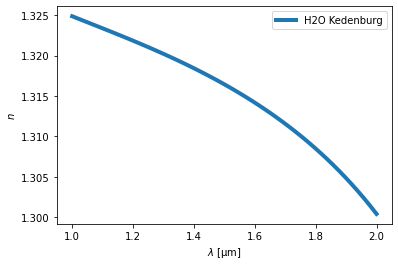

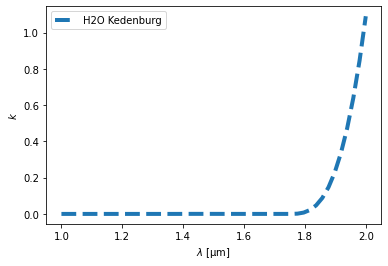

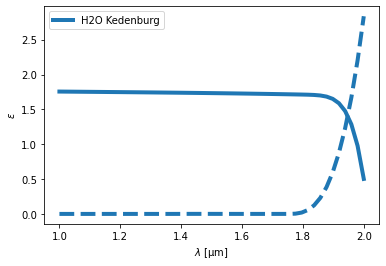

In [6]:
import matplotlib.pyplot as plt
water.plot(wls, "n")
plt.show()
water.plot(wls, "k")
plt.show()
water.plot(wls, "eps")

You can change plot style usint rcParams.

In [7]:
plt.style.use('seaborn-notebook')
plot_params = {
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 'xx-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'legend.fontsize': 'x-large',
}
plt.rcParams.update(plot_params)

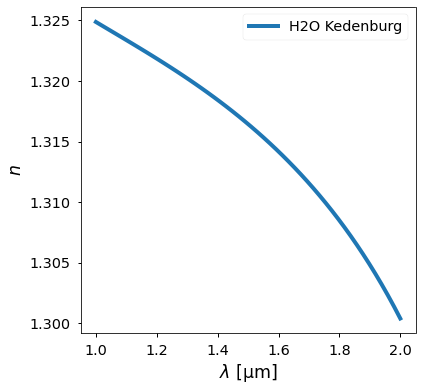

In [8]:
water.plot(wls, "n")

## Water with constant RI

In [9]:
import numpy as np
from riip import Material
water_const = Material({'RI': 1.333})
wl = [0.5, 1.0, 1.5]
n = water_const.n(wl)
k = water_const.k(wl)
eps = water_const.eps(wl)
print(f"At λ={wl}μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=[0.5, 1.0, 1.5]μm:
  n=[1.333 1.333 1.333]
  k=[0. 0. 0.]
  ε=[1.776889+0.j 1.776889+0.j 1.776889+0.j]


## A definition of water in RIID

In [10]:
water = Material({"book": "H2O", "page": "Kedenburg"})
wl = [0.5, 1.0, 1.5]
n = water.n(wl)
k = water.k(wl)
eps = water.eps(wl)
print(f"At λ={wl} μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=[0.5, 1.0, 1.5] μm:
  n=[1.33704353 1.32487335 1.31644826]
  k=[1.89394e-09 3.19106e-06 2.56637e-04]
  ε=[1.78768541+5.06456045e-09j 1.75528941+8.45550074e-06j
 1.73303596+6.75698666e-04j]


## Plot them:

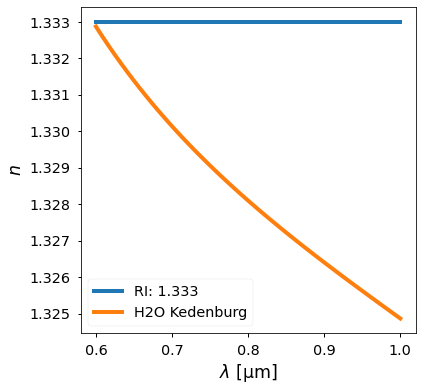

In [11]:
wls = np.linspace(0.6, 1.0)
water_const.plot(wls)
water.plot(wls)

## Material as a function
```
Material__call__(w: float | complex) -> complex
```
* w (float | complex): A float indicating the angular frequency

It returns the complex relative permittivity at given __angular frequency w__.
We use a unit system where the speed of light in vacuum c is 1 and the unit of length is μm.
So w is equal to the vacuum wavenumber ω/c [rad/μm]).

It is much faster than __eps__ method because the formula is accelerated using cython. In the case of same argument, it's even more faster.

In [12]:
gold = Material({'book': 'Au', 'page': 'Stewart-DLF'})
wls = [1.0, 1.5]
ws = [2 * np.pi / wl for wl in wls]

In [13]:
%%timeit
for i in range(1000):
    gold.eps(wls[i % 2])

71.4 ms ± 4.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%%timeit
for i in range(1000):
    gold.eps(wls[0])

68.5 ms ± 4.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
for i in range(1000):
    gold(ws[i % 2])

2.83 ms ± 91 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
for i in range(1000):
    gold(ws[0])

286 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## However, Material is __not__ a numpy.ufunc

In [17]:
try:
    gold(np.array(ws))
except ValueError as e:
    print("ValueError: ", e)

ValueError:  The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


## im_factor

In [18]:
gold_low_loss = Material({'book': 'Au', 'page': 'Stewart-DLF', 'im_factor': 0.1})
print("If im_factor=1.0: Im(ε)=", gold(6.28).imag)
print("If im_factor=0.1: Im(ε)=", gold_low_loss(6.28).imag)

print("Real parts are the same")
print(gold(6.28).real, gold_low_loss(6.28).real)

If im_factor=1.0: Im(ε)= 3.3309657708104403
If im_factor=0.1: Im(ε)= 0.33309657708104407
Real parts are the same
-46.60902219575364 -46.60902219575364


## PEC

In [19]:
pec = Material({"PEC": True})
print(pec.label, pec(1.0))

PEC (-100000000+0j)
